In [1]:
import pandas as pd

In [2]:
#Loading hpa data
df = pd.read_csv('../data/subcellular_location.csv', delimiter='\t') 
print(df.shape)
print(df.columns)

FileNotFoundError: [Errno 2] No such file or directory: '../data/subcellular_location.csv'

In [8]:
# Removing 'Uncertain' data - 11723
# Removing 'Approved' data too - 5460
# df = df[(df['Reliability'] != "Uncertain")] #& (df['Reliability'] != "Approved")]
print(df.shape)

(12390, 14)


In [9]:
#Selecting gene id, GO id, Uncertain locations and reliability
df = df[['Gene name', 'Gene', 'Reliability', 'Uncertain', 'GO id']]
df

,Gene name,Gene,Reliability,Uncertain,GO id
0,TSPAN6,ENSG00000000003,Approved,NaN,Cell Junctions (GO:0030054);Cytosol (GO:000582...
1,SCYL3,ENSG00000000457,Uncertain,Microtubules;Nuclear bodies,Microtubules (GO:0015630);Nuclear bodies (GO:0...
2,C1orf112,ENSG00000000460,Approved,NaN,Mitochondria (GO:0005739)
3,FGR,ENSG00000000938,Approved,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...
4,CFH,ENSG00000000971,Approved,NaN,Vesicles (GO:0043231)
...,...,...,...,...,...
12385,AC012476.1,ENSG00000285396,Approved,NaN,Cytosol (GO:0005829);Nucleoli (GO:0005730)
12386,POLR2J3,ENSG00000285437,Approved,NaN,Nucleoplasm (GO:0005654)
12387,AC093827.5,ENSG00000285458,Approved,NaN,Focal adhesion sites (GO:0005925)
12388,AC134980.5,ENSG00000285472,Approved,NaN,Centrosome (GO:0005813)


In [10]:
#stores the different subcellular locations in the dataset
classes = set()
remove_locs = set(['Rods & Rings', 'Aggresome', 'Microtubule ends', 'Cleavage furrow'])

#list of list of locations per data point. This will later get appended to the dataframe. 
loc = list() 
loc_counts = dict()
for i in df.index:

    locations = set()
    
    # Extract locations from the 'GO id' column
    go_locs = df['GO id'][i].split(';')                     
    go_locs = set([x.split('(')[0].strip() for x in go_locs]) 
    
    try:
        # Extract the uncertain locations, if it exists
        unwanted_locs = set(df['Uncertain'][i].split(';'))  
    except:
        unwanted_locs = set()

    # Get the locations that are not uncertain
    # locations = go_locs - unwanted_locs 
    locations = go_locs.union(unwanted_locs) -remove_locs

    try:
        loc_counts[len(locations)] += 1
    except:
        loc_counts[len(locations)] = 1

    for i in (locations):
        classes.add(i)              # Add each location to the set of locations
    loc.append(locations)           # Add the set of locations to 'locs' list

df['Locations'] = loc
df = df[['Gene name', 'Gene', 'Reliability', 'Locations']]
df.to_csv('../data/hpa_new.csv', index=None)

In [11]:
print(loc_counts)

{3: 1695, 2: 4669, 1: 5765, 4: 236, 5: 18, 6: 3, 0: 4}


{1: 5702, 2: 4324, 3: 1491, 4: 188, 5: 16, 6: 2}

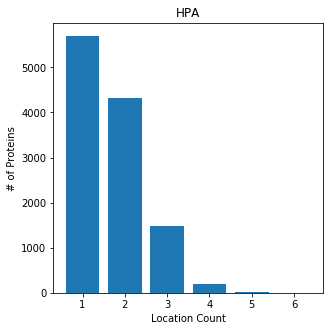

In [57]:
import matplotlib.pyplot as plt

d = {k: v for k, v in sorted(loc_counts.items(), key=lambda x: x[0])}
x = d.keys()
y = d.values()
fig = plt.figure(figsize=(5,5))

ax = fig.add_axes([0.1,0.1,0.75,0.75])
ax.bar(x,y)
ax.set_title('HPA') 
ax.set(xlabel='Location Count', ylabel='# of Proteins')

fig.tight_layout()
fig.savefig('../hpa_count.png')